In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_ecommerce.csv')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,01/12/2010 08:26,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,01/12/2010 08:26,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,01/12/2010 08:26,17850.0,SC3463,Books,78,61.49,Mali
3,536365,01/12/2010 08:26,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,01/12/2010 08:26,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
df = df.dropna(subset = ['CustomerID'])
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [6]:
df['CustomerID']=df['CustomerID'].astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
num_customer = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
num_products = df['StockCode'].nunique()

In [8]:
print (f'Number of unique customers {num_customer}')
print (f'Number of Transactions {num_transactions}')
print (f'Number of Products {num_products}')

Number of unique customers 4372
Number of Transactions 22190
Number of Products 9000


In [9]:
date_range = (df['InvoiceDate'].min(),df['InvoiceDate'].max())
print(f' Transction Period :{date_range[0]},{date_range[1]}')

 Transction Period :2010-12-01 08:26:00,2011-12-09 12:50:00


In [10]:
print(f' Rows with negative qunatity: {(df.Quantity <= 0).sum()}')

 Rows with negative qunatity: 0


In [11]:
print(f' Rows with negative UnitPrice: {(df.UnitPrice <= 0).sum()}')

 Rows with negative UnitPrice: 0


In [12]:
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()
top_countries

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64

C:\Users\Ogenna\AppData\Local\Temp\ipykernel_19600\1452404011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis')


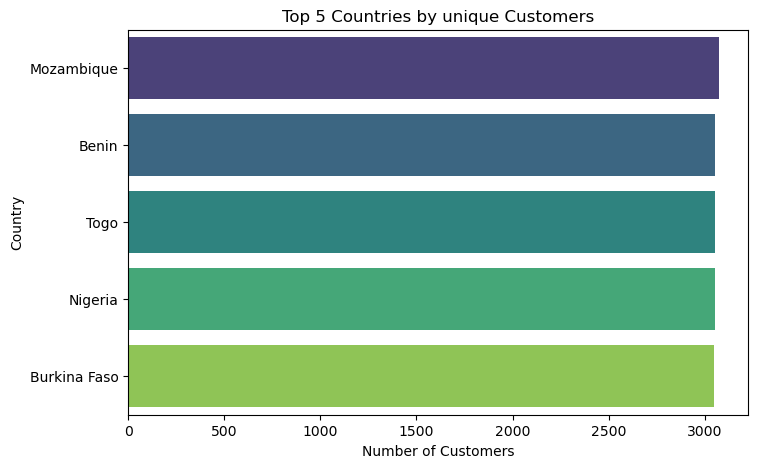

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis')
plt.title('Top 5 Countries by unique Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

C:\Users\Ogenna\AppData\Local\Temp\ipykernel_19600\2084234510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis')


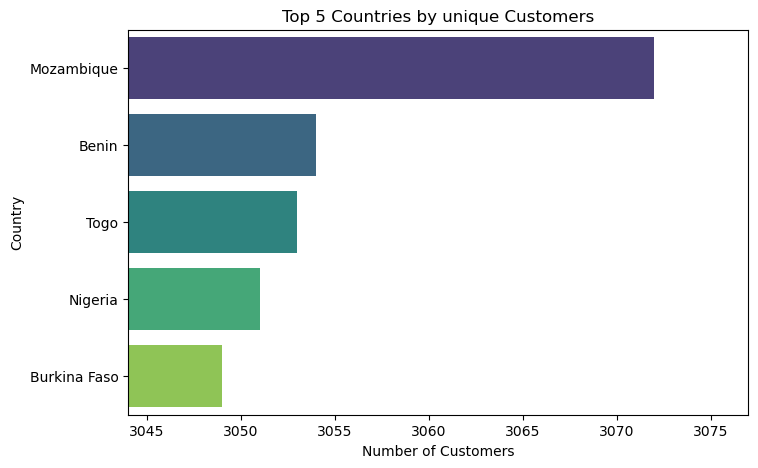

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values,y=top_countries.index,palette='viridis')
plt.xlim(min(top_countries.values)-5,max(top_countries.values) + 5)
plt.title('Top 5 Countries by unique Customers')
plt.xlabel('Number of Customers') 
plt.ylabel('Country')
plt.savefig("Top 5 Countries by unique customers.png",dpi=300,bbox_inches = 'tight',facecolor = 'white')
plt.show()



In [15]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda


In [16]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [17]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50


In [19]:
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index()
monthly_sales

,InvoiceMonth,Revenue
0,2010-12,6.792367e+07
1,2011-01,5.582933e+07
2,2011-02,5.208536e+07
3,2011-03,7.137210e+07
4,2011-04,5.914003e+07
5,2011-05,7.434151e+07
6,2011-06,7.109639e+07
7,2011-07,7.040789e+07
8,2011-08,6.994326e+07
9,2011-09,1.036281e+08


In [20]:
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

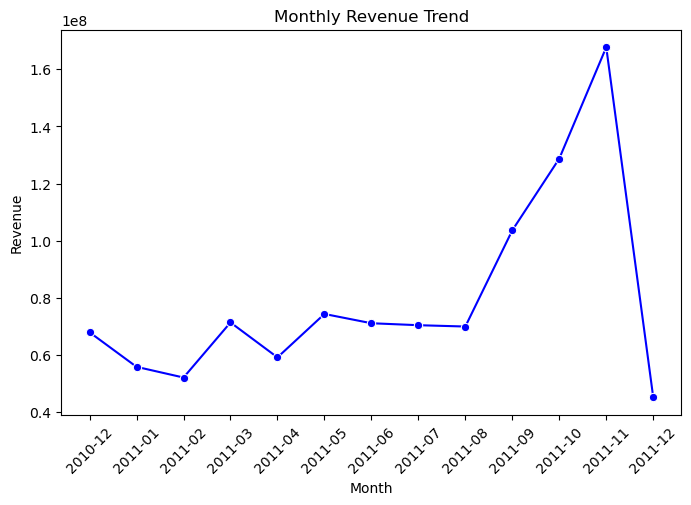

In [21]:
plt.figure(figsize=(8,5))
sns.lineplot(x= 'InvoiceMonth',y='Revenue',data=monthly_sales,marker='o',color = 'blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.savefig("Monthly revenue trend.png")
plt.show()

In [22]:
#cohort Analysis

In [23]:
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()

In [24]:
cohort_data.name = 'CohortMonth'

In [25]:
cohort_data

CustomerID
12346    2011-01
12347    2010-12
12348    2010-12
12349    2011-11
12350    2011-02
          ...   
18280    2011-03
18281    2011-06
18282    2011-08
18283    2011-01
18287    2011-05
Name: CohortMonth, Length: 4372, dtype: period[M]

In [26]:
df = df.merge(cohort_data, on = 'CustomerID')

In [27]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12


In [28]:
#cohort index

In [29]:
invoice_year,invoice_month = df ['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month
cohort_year,cohort_month = df ['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [30]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [31]:
df['CohortIndex'] = year_diff * 12 + month_diff +1
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth,CohortIndex
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,2011-12,913.25,2011-08,5
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,2011-12,8521.10,2011-08,5
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,2011-12,560.98,2011-08,5
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,2011-12,3592.35,2011-08,5
406828,581587,2011-12-09 12:50:00,12680,SC9276,Toys,6,46.62,Ethiopia,2011-12,279.72,2011-08,5


In [32]:
cohort_counts = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index ='CohortMonth',columns = 'CohortIndex', values = 'CustomerID')                           

In [33]:
cohort_pivot


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
cohort_pivot.to_excel("CohortAnalysis.xlsx",index=True)

In [35]:
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size,axis=0).round(3)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


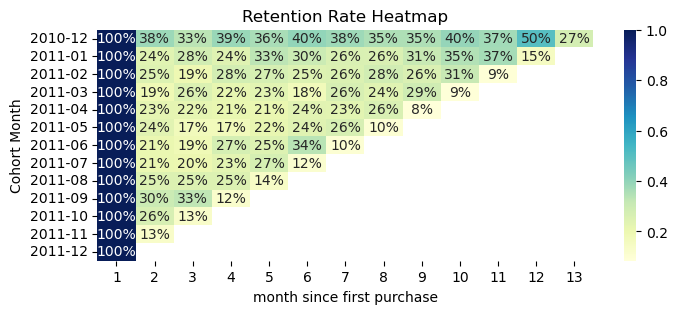

In [36]:
plt.figure(figsize =(8,3))
sns.heatmap(retention,annot=True,fmt='.0%',cmap = 'YlGnBu')
plt.title('Retention Rate Heatmap')
plt.xlabel('month since first purchase')
plt.ylabel('Cohort Month')
plt.show()

In [37]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [38]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'InvoiceNo' : pd.Series.nunique,
    'Revenue' : 'sum'
}).reset_index()

In [39]:
rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [40]:
rfm.describe()

,InvoiceDate,InvoiceNo,Revenue
count,4372.000000,4372.000000,4.372000e+03
mean,92.047118,5.075480,2.372909e+05
std,100.765435,9.338754,5.944603e+05
min,1.000000,1.000000,1.736000e+01
25%,17.000000,1.000000,4.350893e+04
50%,50.000000,3.000000,1.066925e+05
75%,143.000000,5.000000,2.599154e+05
max,374.000000,248.000000,2.038383e+07


In [43]:
rfm.columns = ['CustomerID','recency_days','frequency','monetary']

In [44]:
X = rfm[['recency_days', 'frequency', 'monetary']].copy()

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss = StandardScaler()

In [47]:
X_scaled = ss.fit_transform(X)

In [48]:
X_scaled[:5]

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       [-0.72500529, -0.43645506, -0.1029888 ],
       [ 2.16322008, -0.43645506, -0.31816948]])

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
from sklearn.cluster import KMeans

In [51]:
inertia = []
s_score = []
K_range = range(2, 11)

In [52]:
for k in K_range:
    km = KMeans(n_clusters = k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    s_score.append(silhouette_score(X_scaled, labels))

Text(0, 0.5, 'Inertia')

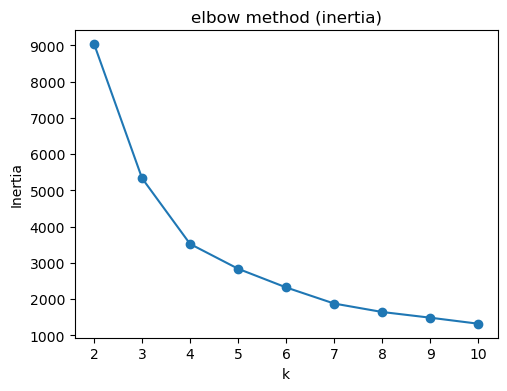

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('elbow method (inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

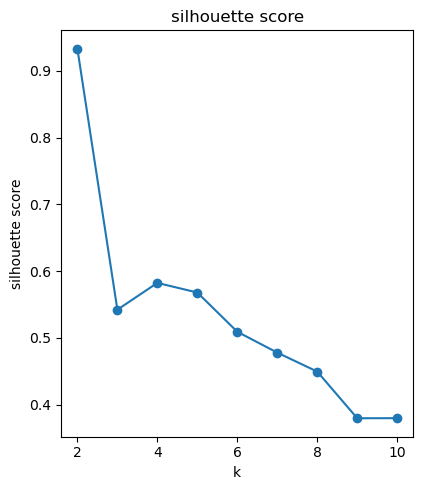

In [54]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
plt.plot(K_range, s_score, marker='o')
plt.title('silhouette score')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.tight_layout()
plt.show()

In [55]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [56]:
from yellowbrick.cluster import KElbowVisualizer

In [57]:
model = KMeans(random_state=42)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

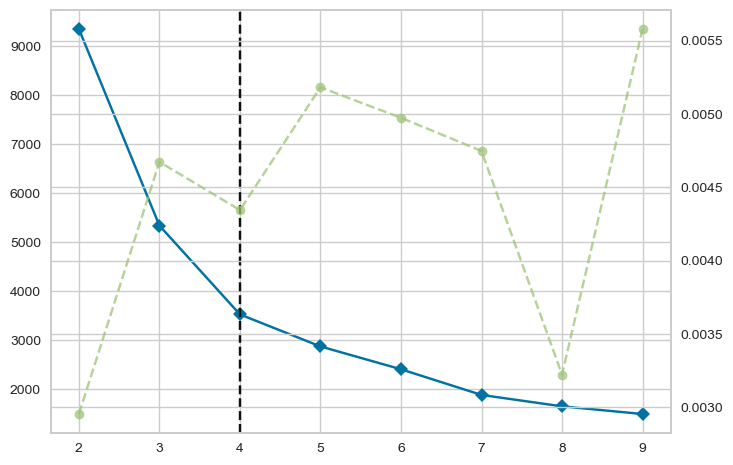

In [58]:
v = KElbowVisualizer(model, k=(2,10))
v.fit(X_scaled)

In [59]:
final_k = 4

In [60]:
final_model = KMeans(n_clusters=final_k, random_state=42)

In [61]:
final_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [62]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [63]:
rfm['cluster'] = final_model.labels_

In [64]:
rfm.head()

,CustomerID,recency_days,frequency,monetary,cluster
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1


In [65]:
cluster_profile = rfm.groupby('cluster').agg({
    'recency_days' : 'mean',
    'frequency' : 'mean',
    'monetary' : 'mean',
    'CustomerID' : 'count'
    }).rename(columns={'CustomerID': 'NumCustomer' }).round(1)

In [66]:
cluster_profile

,recency_days,frequency,monetary,NumCustomer
cluster,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266


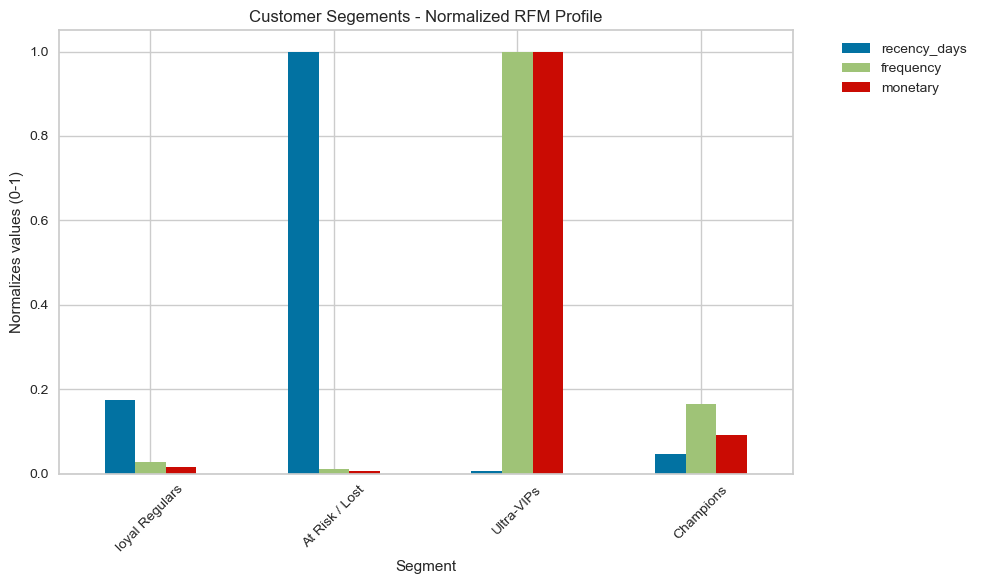

In [67]:
cluster_names = {
    0: "loyal Regulars",
    1: "At Risk / Lost",
    2: "Ultra-VIPs",
    3: "Champions"
}
cluster_profile['Segment'] = cluster_profile.index.map(cluster_names)

df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'monetary']] = (
    df_plot[['recency_days', 'frequency', 'monetary']]
    .apply(lambda x: x / x.max())
)
df_plot.set_index('Segment')[['recency_days', 'frequency', 'monetary']].plot(
    kind='bar', figsize=(10,6)
)
plt.title('Customer Segements - Normalized RFM Profile')
plt.ylabel('Normalizes values (0-1)')
plt.xticks(rotation=45)
plt.legend(['recency_days', 'frequency', 'monetary'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [68]:
ultra_vips = rfm [rfm['cluster'] == 2].copy()

In [69]:
ultra_vips

,CustomerID,recency_days,frequency,monetary,cluster
330,12748,1,224,11912482.34,2
1300,14096,4,34,12965429.74,2
1674,14606,1,128,7144512.92,2
1895,14911,1,248,15362741.47,2
2192,15311,1,118,6301150.63,2
4042,17841,2,169,20383830.65,2


In [72]:
customer_cohort = df[['CustomerID','CohortMonth']].drop_duplicates()
customer_cohort

,CustomerID,CohortMonth
0,17850,2010-12
9,13047,2010-12
26,12583,2010-12
46,13748,2010-12
65,15100,2010-12
...,...,...
403812,13436,2011-12
403893,15520,2011-12
404640,13298,2011-12
405385,14569,2011-12


In [73]:
cluster2_customers= ultra_vips.merge(customer_cohort, on = 'CustomerID', how = 'left')
cluster2_customers

,CustomerID,recency_days,frequency,monetary,cluster,CohortMonth
0,12748,1,224,11912482.34,2,2010-12
1,14096,4,34,12965429.74,2,2011-08
2,14606,1,128,7144512.92,2,2010-12
3,14911,1,248,15362741.47,2,2010-12
4,15311,1,118,6301150.63,2,2010-12
5,17841,2,169,20383830.65,2,2010-12
